#**Introduction**

Name : Rahardiansyah Fatoni

Batch : RMT-027

Objective : To create a clustering model for customer segmentation, we will analyze a bank's credit card data spanning the last six months.


---



#Unsupervised Learning

##1. Data Loading and Exploration
- Load Libraries and Dependencies
- Load Dataset
- Understand the Data (head(), info(), describe())
- Check for Missing Values
- Visualize Data (matplotlib, seaborn)

###1.1 Load Libraries and Dependencies:

In [70]:
# Import necessary libraries
import pandas as pd
import numpy as np
from google.colab import auth
from google.cloud import bigquery
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Preprocessing libraries
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

#Model saving
import pickle
import json

###1.2 Load Dataset:

In [2]:
auth.authenticate_user()
project_id = "proud-woods-408708" # Ini project ID
client = bigquery.Client(project=project_id)

In [3]:
query = """
SELECT *
FROM `ftds-hacktiv8-project.phase1_ftds_027_rmt.credit-card-information`
WHERE MOD(`CUST_ID`, 2) != 0
"""
# Set up the query
df = client.query(query).to_dataframe()
df.T

,0,1,2,3,4,5,6,7,8,9,...,4465,4466,4467,4468,4469,4470,4471,4472,4473,4474
CUST_ID,3091,5069,6075,6291,7755,8299,8629,8805,7,91,...,6809,7211,8295,8855,2389,2345,6785,7347,8447,1995
BALANCE,3.833185,0.0,757.964752,264.566591,440.613643,611.561026,0.228572,105.333584,16.379412,559.151424,...,4438.521324,1135.70375,185.984965,3531.167073,1917.89573,9629.808851,1040.030221,1322.818587,1060.391273,3447.674222
BALANCE_FREQUENCY,0.125,0.0,0.875,0.375,1.0,1.0,0.125,0.375,0.454545,1.0,...,1.0,1.0,0.454545,0.9,1.0,1.0,1.0,1.0,1.0,1.0
PURCHASES,45.0,176.03,157.4,1150.0,600.0,765.0,60.0,306.0,178.15,94.0,...,591.84,92.07,482.24,797.5,285.07,0.0,0.0,0.0,0.0,205.0
ONEOFF_PURCHASES,45.0,176.03,157.4,1150.0,600.0,765.0,60.0,306.0,0.0,94.0,...,109.16,0.0,392.24,577.83,285.07,0.0,0.0,0.0,0.0,205.0
INSTALLMENTS_PURCHASES,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,178.15,0.0,...,482.68,92.07,90.0,219.67,0.0,0.0,0.0,0.0,0.0,0.0
CASH_ADVANCE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,564.365429,81.509491,903.843591,5273.226918,6084.858872,4372.393835,1390.64829,762.301096,1475.858013,4548.057776
PURCHASES_FREQUENCY,0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.25,0.25,...,0.636364,0.272727,0.272727,0.7,0.363636,0.0,0.0,0.0,0.0,0.090909
ONEOFF_PURCHASES_FREQUENCY,0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.0,0.25,...,0.181818,0.0,0.181818,0.4,0.363636,0.0,0.0,0.0,0.0,0.090909
PURCHASES_INSTALLMENTS_FREQUENCY,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.0,...,0.454545,0.181818,0.090909,0.5,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# Turn data into csv
df.to_csv("P1G6_Set_1_rahardiansyah-fatoni.csv")

###1.3 Understand the Data

In [5]:
# Show first 10 rows of dataset
df.head(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,3091,3.833185,0.125000,45.00,45.00,0.00,0.0,0.125,0.125,0.00,0.0,0,1,500.0,0.000000,NaN,0.000000,8
1,5069,0.000000,0.000000,176.03,176.03,0.00,0.0,0.125,0.125,0.00,0.0,0,1,7000.0,0.000000,NaN,0.000000,8
2,6075,757.964752,0.875000,157.40,157.40,0.00,0.0,0.125,0.125,0.00,0.0,0,6,1200.0,1494.480376,2638.598410,0.000000,8
3,6291,264.566591,0.375000,1150.00,1150.00,0.00,0.0,0.125,0.125,0.00,0.0,0,1,1200.0,3029.380326,85.428885,0.000000,8
4,7755,440.613643,1.000000,600.00,600.00,0.00,0.0,0.125,0.125,0.00,0.0,0,1,1000.0,215.316424,137.846006,0.000000,8
5,8299,611.561026,1.000000,765.00,765.00,0.00,0.0,0.125,0.125,0.00,0.0,0,1,2000.0,204.464151,146.352314,0.000000,8
6,8629,0.228572,0.125000,60.00,60.00,0.00,0.0,0.125,0.125,0.00,0.0,0,1,1500.0,438.738982,NaN,0.000000,8
7,8805,105.333584,0.375000,306.00,306.00,0.00,0.0,0.125,0.125,0.00,0.0,0,2,6000.0,101.986927,118.324082,0.000000,8
8,7,16.379412,0.454545,178.15,0.00,178.15,0.0,0.250,0.000,0.25,0.0,0,3,5000.0,229.376368,89.613822,0.181818,12
9,91,559.151424,1.000000,94.00,94.00,0.00,0.0,0.250,0.250,0.00,0.0,0,3,5500.0,254.733329,218.279194,0.000000,12


In [6]:
# Show last 10 rows of dataset
df.tail(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
4465,6809,4438.521324,1.000000,591.84,109.16,482.68,564.365429,0.636364,0.181818,0.454545,0.272727,3,11,17000.0,5552.601399,1094.486286,0.00,11
4466,7211,1135.703750,1.000000,92.07,0.00,92.07,81.509491,0.272727,0.000000,0.181818,0.272727,3,3,1200.0,355.798199,434.689529,0.00,11
4467,8295,185.984965,0.454545,482.24,392.24,90.00,903.843591,0.272727,0.181818,0.090909,0.272727,8,8,1200.0,2333.997439,160.900585,0.25,11
4468,8855,3531.167073,0.900000,797.50,577.83,219.67,5273.226918,0.700000,0.400000,0.500000,0.900000,33,21,4000.0,2979.546700,3052.080103,0.00,10
4469,2389,1917.895730,1.000000,285.07,285.07,0.00,6084.858872,0.363636,0.363636,0.000000,1.090909,28,6,3000.0,5692.682993,556.449635,0.00,11
4470,2345,9629.808851,1.000000,0.00,0.00,0.00,4372.393835,0.000000,0.000000,0.000000,0.545455,9,0,12000.0,2468.988022,2134.295731,0.00,11
4471,6785,1040.030221,1.000000,0.00,0.00,0.00,1390.648290,0.000000,0.000000,0.000000,0.545455,18,0,1400.0,290.129620,287.994171,0.00,11
4472,7347,1322.818587,1.000000,0.00,0.00,0.00,762.301096,0.000000,0.000000,0.000000,0.545455,11,0,1500.0,1035.627320,312.835530,0.00,11
4473,8447,1060.391273,1.000000,0.00,0.00,0.00,1475.858013,0.000000,0.000000,0.000000,0.545455,10,0,2000.0,407.360560,277.084736,0.00,11
4474,1995,3447.674222,1.000000,205.00,205.00,0.00,4548.057776,0.090909,0.090909,0.000000,0.545455,7,1,10500.0,665.239171,817.844662,0.00,11


In [7]:
# Display basic information about the dataset (columns, data types, non-null counts)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4475 entries, 0 to 4474
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           4475 non-null   Int64  
 1   BALANCE                           4475 non-null   float64
 2   BALANCE_FREQUENCY                 4475 non-null   float64
 3   PURCHASES                         4475 non-null   float64
 4   ONEOFF_PURCHASES                  4475 non-null   float64
 5   INSTALLMENTS_PURCHASES            4475 non-null   float64
 6   CASH_ADVANCE                      4475 non-null   float64
 7   PURCHASES_FREQUENCY               4475 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        4475 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  4475 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            4475 non-null   float64
 11  CASH_ADVANCE_TRX                  4475 non-null   Int64  
 12  PURCHA

$Insight:$
- There are 4475 customer credit data entries with 0 null values detected on any of the variables, besides `MINIMUM_PAYMENTS`
- All datatypes are either Int64 or float64, and after seeing the `df.head()` we can conclude that all the data are indeed numerical values.

In [8]:
# Remove CUST_ID column.

df = df.drop('CUST_ID', axis=1)
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,3.833185,0.125,45.00,45.00,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,500.0,0.000000,NaN,0.0,8
1,0.000000,0.000,176.03,176.03,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,7000.0,0.000000,NaN,0.0,8
2,757.964752,0.875,157.40,157.40,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,6,1200.0,1494.480376,2638.598410,0.0,8
3,264.566591,0.375,1150.00,1150.00,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,1200.0,3029.380326,85.428885,0.0,8
4,440.613643,1.000,600.00,600.00,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,1000.0,215.316424,137.846006,0.0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4470,9629.808851,1.000,0.00,0.00,0.0,4372.393835,0.000000,0.000000,0.0,0.545455,9,0,12000.0,2468.988022,2134.295731,0.0,11
4471,1040.030221,1.000,0.00,0.00,0.0,1390.648290,0.000000,0.000000,0.0,0.545455,18,0,1400.0,290.129620,287.994171,0.0,11
4472,1322.818587,1.000,0.00,0.00,0.0,762.301096,0.000000,0.000000,0.0,0.545455,11,0,1500.0,1035.627320,312.835530,0.0,11
4473,1060.391273,1.000,0.00,0.00,0.0,1475.858013,0.000000,0.000000,0.0,0.545455,10,0,2000.0,407.360560,277.084736,0.0,11


In [9]:
# Display summary statistics of numerical columns
print(df.describe())

            BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   4475.000000        4475.000000   4475.000000       4475.000000   
mean    1563.205717           0.876933   1003.251343        596.369893   
std     2072.045789           0.238222   2060.034730       1653.425984   
min        0.000000           0.000000      0.000000          0.000000   
25%      124.432849           0.888889     39.560000          0.000000   
50%      871.355430           1.000000    360.000000         45.650000   
75%     2047.570799           1.000000   1102.420000        575.220000   
max    18495.558550           1.000000  41050.400000      40624.060000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             4475.000000   4475.000000          4475.000000   
mean               407.110215    984.288554             0.490579   
std                880.799744   2060.448056             0.402907   
min                  0.000000      0.000000             0.000

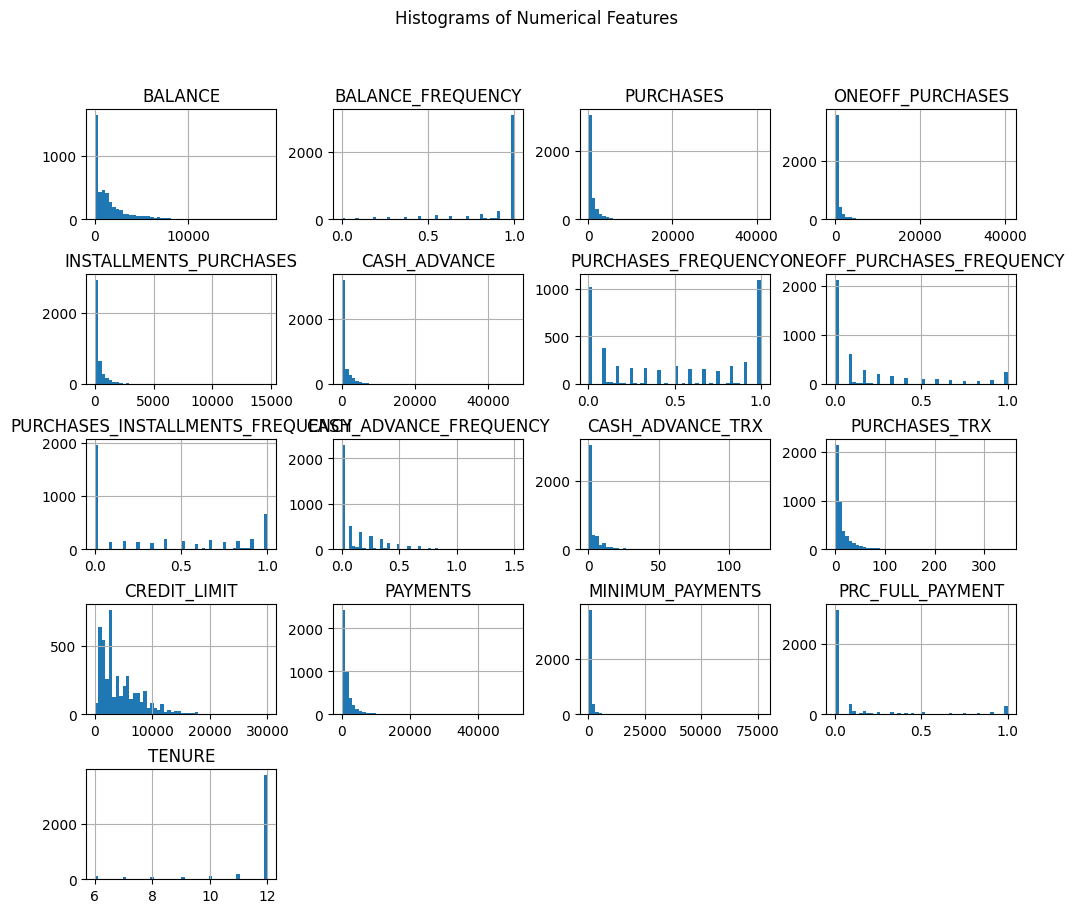

In [10]:
# Visualize the distribution of numerical features (histograms)
df.hist(bins=50, figsize=(12, 10))
plt.suptitle('Histograms of Numerical Features')
plt.subplots_adjust(hspace=0.5)
plt.show()

In [11]:
# Calculate skewness for each column
skewness = df.skew()

# Display skewness values
print("Skewness for each column:")
print(skewness)

Skewness for each column:
BALANCE                              2.329009
BALANCE_FREQUENCY                   -2.026530
PURCHASES                            7.071706
ONEOFF_PURCHASES                     9.951057
INSTALLMENTS_PURCHASES               6.330630
CASH_ADVANCE                         5.638109
PURCHASES_FREQUENCY                  0.058755
ONEOFF_PURCHASES_FREQUENCY           1.548319
PURCHASES_INSTALLMENTS_FREQUENCY     0.508296
CASH_ADVANCE_FREQUENCY               1.834211
CASH_ADVANCE_TRX                     6.420104
PURCHASES_TRX                        4.747507
CREDIT_LIMIT                         1.498948
PAYMENTS                             5.747503
MINIMUM_PAYMENTS                    14.669771
PRC_FULL_PAYMENT                     1.975238
TENURE                              -2.954159
dtype: float64


$Insight:$
- The numerical columns all have either a right skew, or a left skew, with the exception of `PURCHASE_FREQUENCY` (Which only have a slight positive skew) (Close to \0.05\)

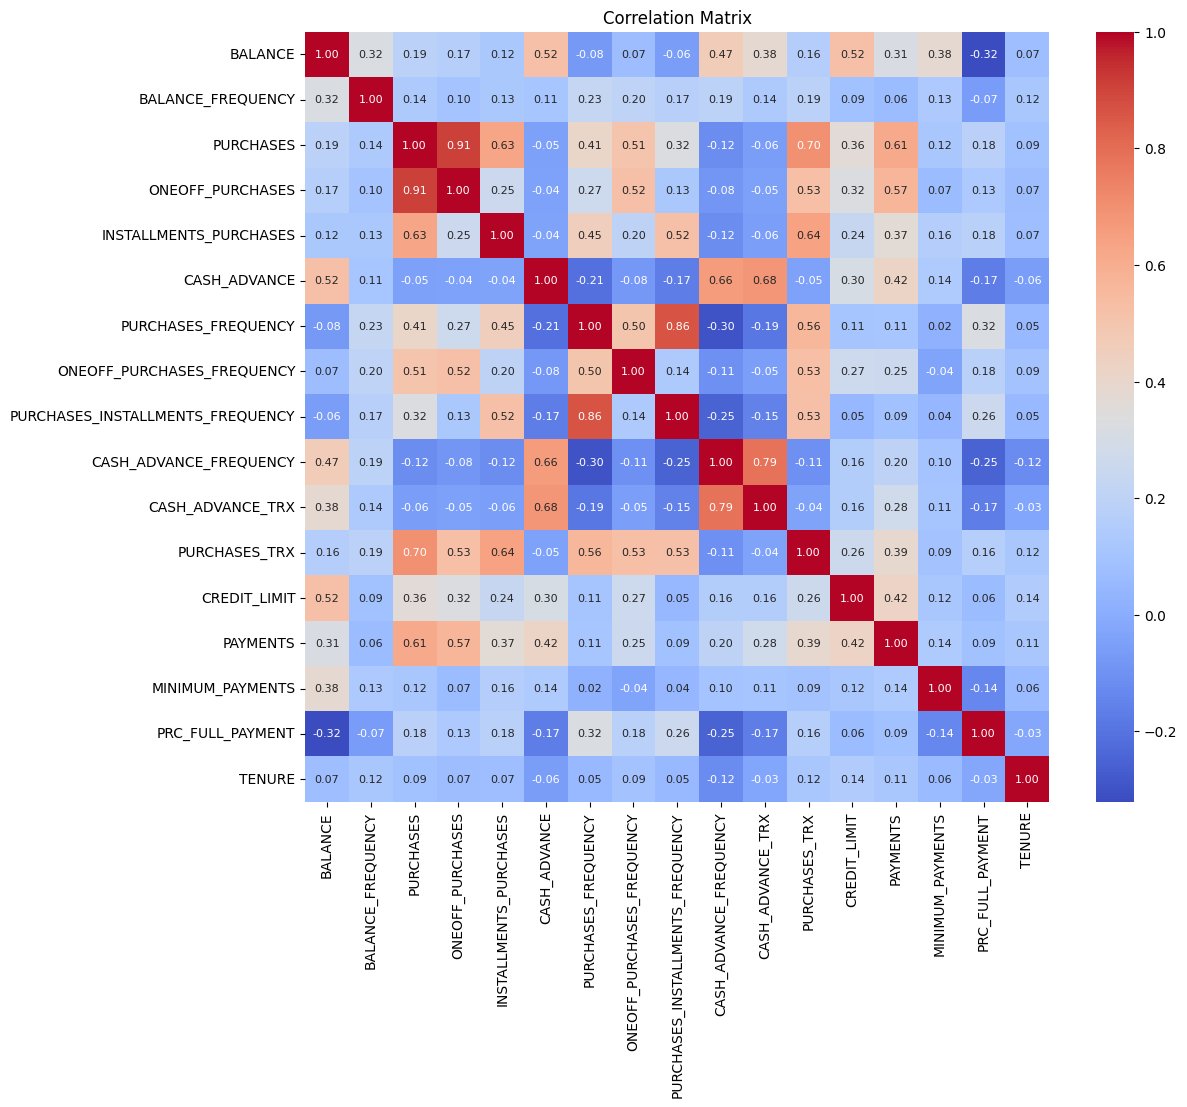

In [12]:
# Visualize the correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 8})
plt.title('Correlation Matrix')
plt.show()

$Insight:$
- The heatmap shows a strong positive correlation between transaction (`TRX`) variables and frequency (`FREQUENCY`) variables.
- There is also a strong positive correlation between `PURCHASES` and `ONEOFF_PURCHASES`.
- Finally there is a strong negative correlation between `BALANCE` and percent of full payment `PRC_FULL_PAYMENT`.

##2. Feature Engineering

####2.1 Handle Missing Values:

In [13]:
df.isna().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          0
PAYMENTS                              0
MINIMUM_PAYMENTS                    155
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

As previously stated, there are missing values in `MINIMUM_PAYMENTS` variable, looking at the dataset schema, the description for `MINIMUM_PAYMENTS` are as follow: minimum amount of payments made by user.

$Insight:$
- Therefore, based on the description we will assume that when `MINIMUM_PAYMENTS` is NaN it will be turned to 0 instead.

In [14]:
df.fillna(0, inplace=True)

###2.2 Scale or Normalize Features:

In [15]:
# Scale using robustscaler to handle outliers
scaler = RobustScaler()
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
df_scaled = df
df_scaled[numerical_columns] = scaler.fit_transform(df[numerical_columns])

###2.3 Handle Outliers:

####Identify Outliers:

In [16]:
numerical_feature = df_scaled.select_dtypes(include=['int64', 'float64']).columns.tolist()

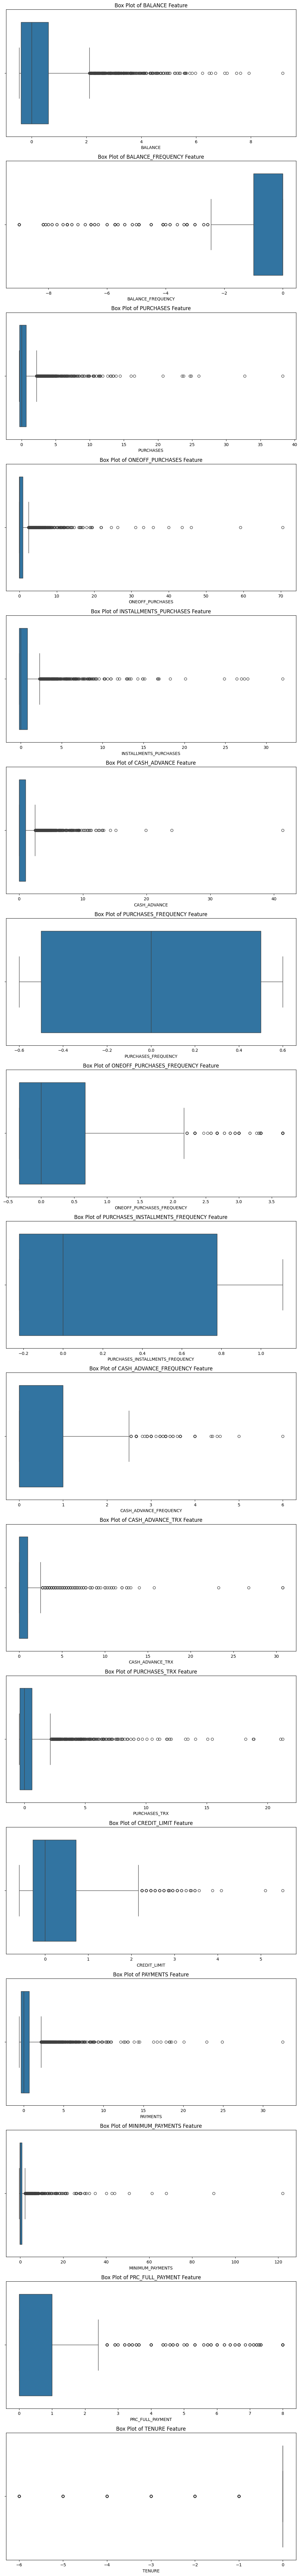

In [17]:
# Using box plot to identify outliers
plt.figure(figsize=(10, 5 * len(numerical_feature)))

for i, feature in enumerate(numerical_feature, 1):
    plt.subplot(len(numerical_feature), 1, i)
    sns.boxplot(x=df[feature])
    plt.title(f'Box Plot of {feature} Feature')

plt.tight_layout()
plt.show()

$Insight:$
- As we have previously visualized the variables are highly skewed and therefore is suspectable to outliers.

####Handling Outliers:


Previously, we have used RobustScaler to handle the outlier.

###2.4 Dimensionality Reduction:

In [18]:
# Dimensionality Reduction using PCA
pca = PCA()
pca.fit(df_scaled)

PCA()

Text(0, 0.5, 'Eigenvalues')

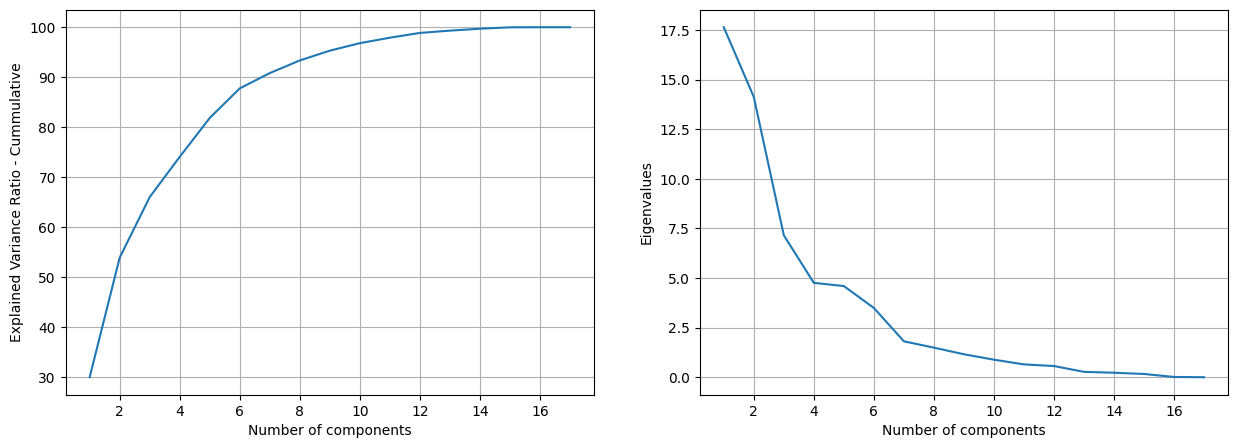

In [19]:
# Plot the Cummulative of Explained Variance Ratio
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.grid()
plt.plot(range(1, 18), np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel('Number of components')
plt.ylabel('Explained Variance Ratio - Cummulative')

# Plot the Eigenvalues
plt.subplot(1, 2, 2)
plt.grid()
plt.plot(range(1, 18), pca.explained_variance_ )
plt.xlabel('Number of components')
plt.ylabel('Eigenvalues')

In [20]:
# Check the number of features if we want to retain 95 % of the information

cumsum = np.cumsum(pca.explained_variance_ratio_)
num_features = np.argmax(cumsum >= 0.95) + 1
num_features

9

We will reduce the features from 16 features to 9.

In [21]:
# Let's train the model with 95 % of the original dataset information

pca = PCA(n_components=0.95)
pca.fit(df_scaled)

df_scaled_pca = pca.transform(df_scaled)

##3. Model Definition & Training

### 3.1 Find the Optimal Number of Clusters

#####Using Elbow Method

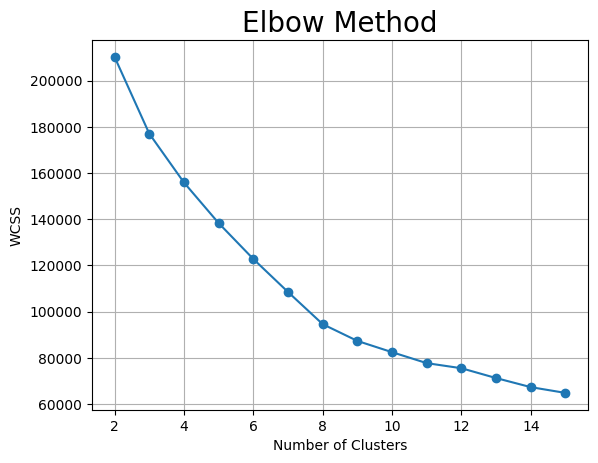

In [23]:
# Find the optimal number of clusters using Elbow Method
wcss = []
random_state = 10
max_cluster = 15
for i in range(2, max_cluster+1):
    km = KMeans(n_clusters = i,
                init = 'k-means++',
                max_iter = 300,
                n_init = 10,
                random_state = random_state)
    km.fit(df_scaled_pca)
    wcss.append(km.inertia_)

plt.plot(range(2, max_cluster+1), wcss, marker ="o")
plt.grid()
plt.title('Elbow Method', fontsize = 20)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

---
$Insight:$
- Based on the plot, the location of the elbow is in cluster 8.

#####Using Silhoutte Plot & Silhoutte Score

Next, we will find the silhouette score and silhouette plot. The following code is taken from [Scikit-Learn documentation page](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py)

In [24]:
# Function to create Silhouette Plot

import matplotlib.cm as cm
from sklearn.metrics import silhouette_score,silhouette_samples

def plot_silhouette(range_n_clusters, X, random_state):
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 4)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters = n_clusters, init = 'k-means++', max_iter = 300, n_init = 10, random_state = random_state)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        # Labeling the clusters
        centers = clusterer.cluster_centers_

        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

For n_clusters = 2 The average silhouette_score is : 0.6216264969418841
For n_clusters = 3 The average silhouette_score is : 0.544714679829056
For n_clusters = 4 The average silhouette_score is : 0.25727167330855866
For n_clusters = 5 The average silhouette_score is : 0.26717796428158513
For n_clusters = 6 The average silhouette_score is : 0.28407743956046805
For n_clusters = 7 The average silhouette_score is : 0.3196502471841148
For n_clusters = 8 The average silhouette_score is : 0.3273639986496216
For n_clusters = 9 The average silhouette_score is : 0.32142259937686657
For n_clusters = 10 The average silhouette_score is : 0.31779224977971166
For n_clusters = 11 The average silhouette_score is : 0.29567393564198585
For n_clusters = 12 The average silhouette_score is : 0.2904302367848059
For n_clusters = 13 The average silhouette_score is : 0.2853956678071104
For n_clusters = 14 The average silhouette_score is : 0.3133175225264708


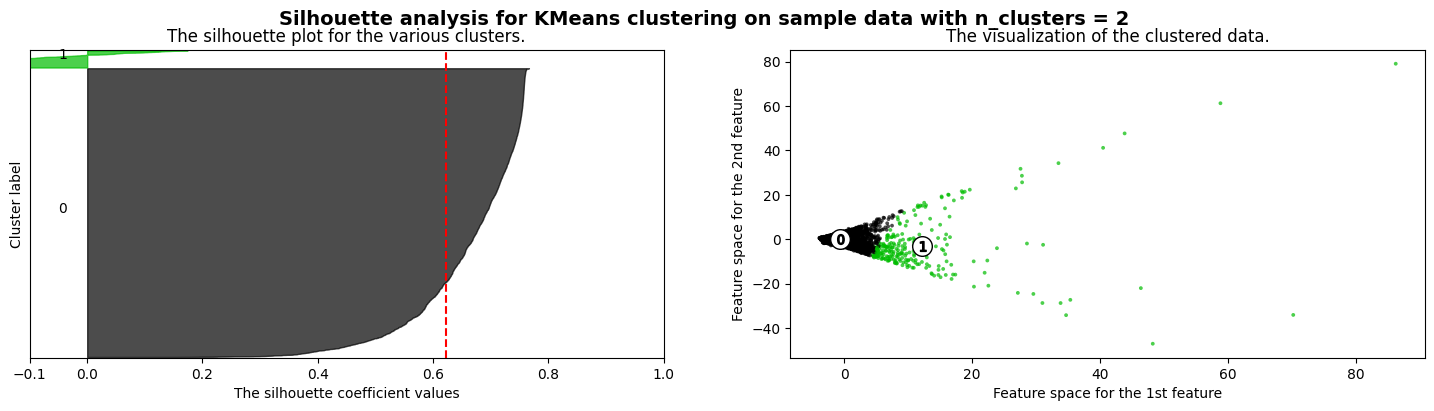

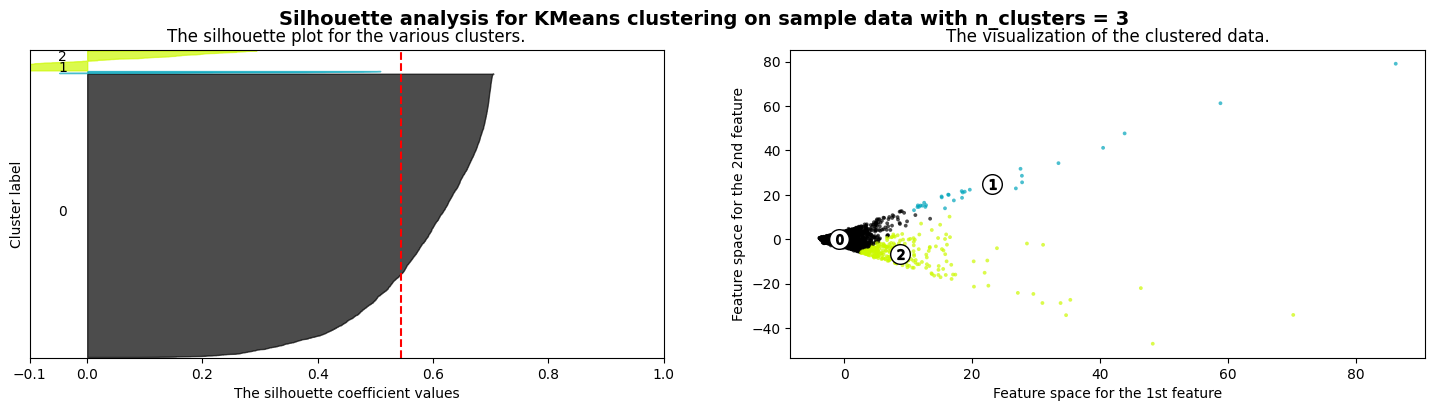

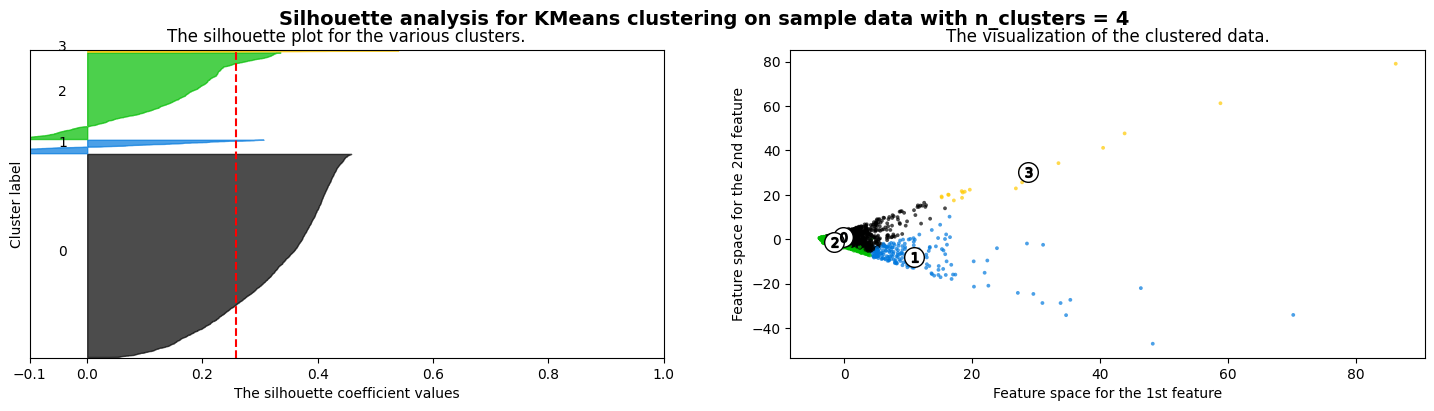

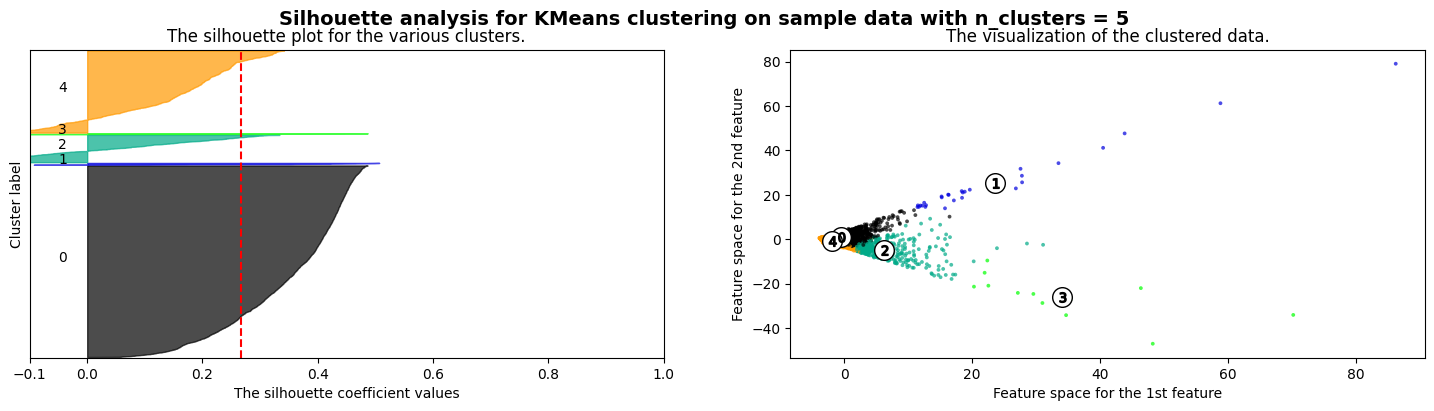

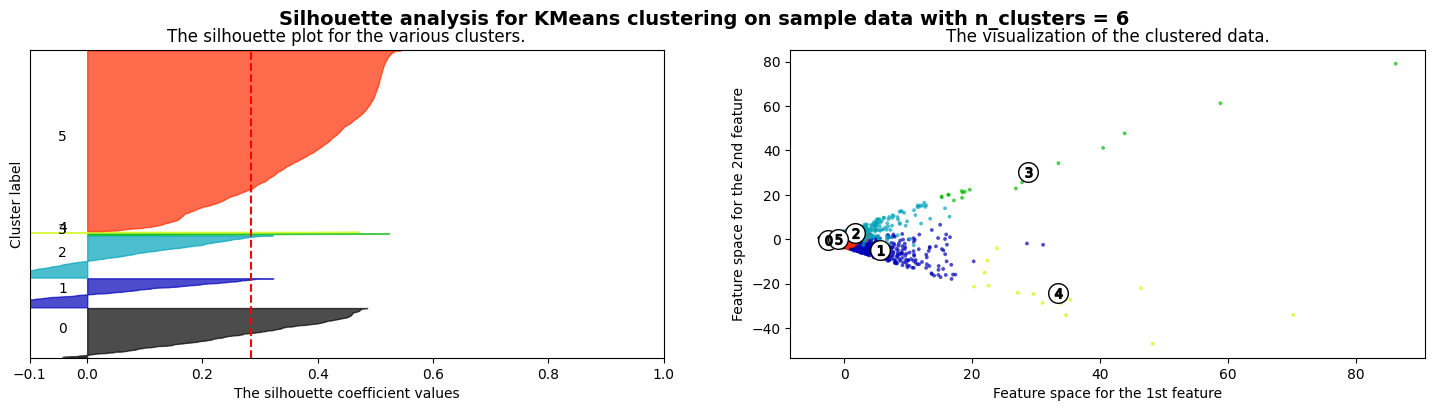

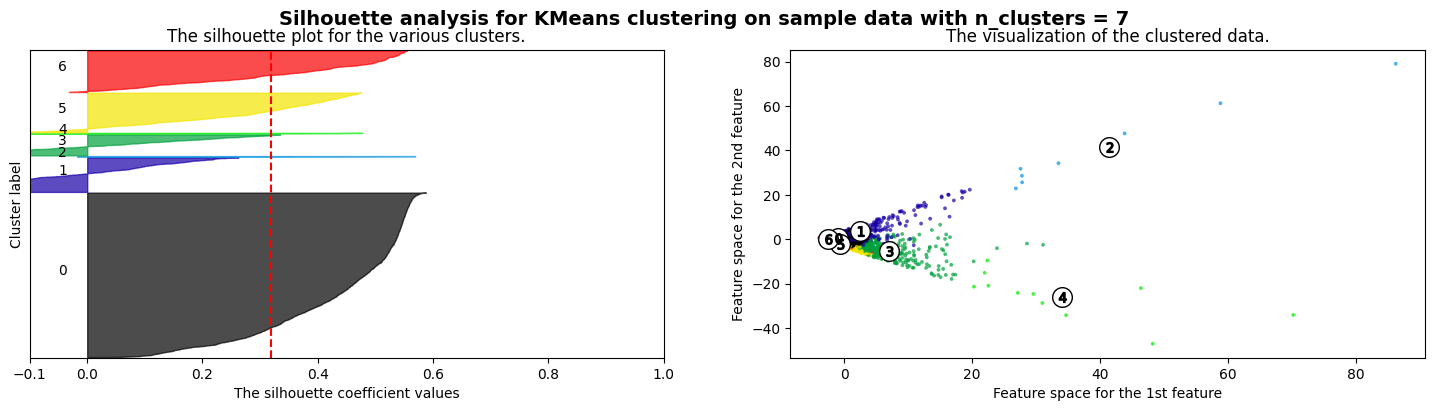

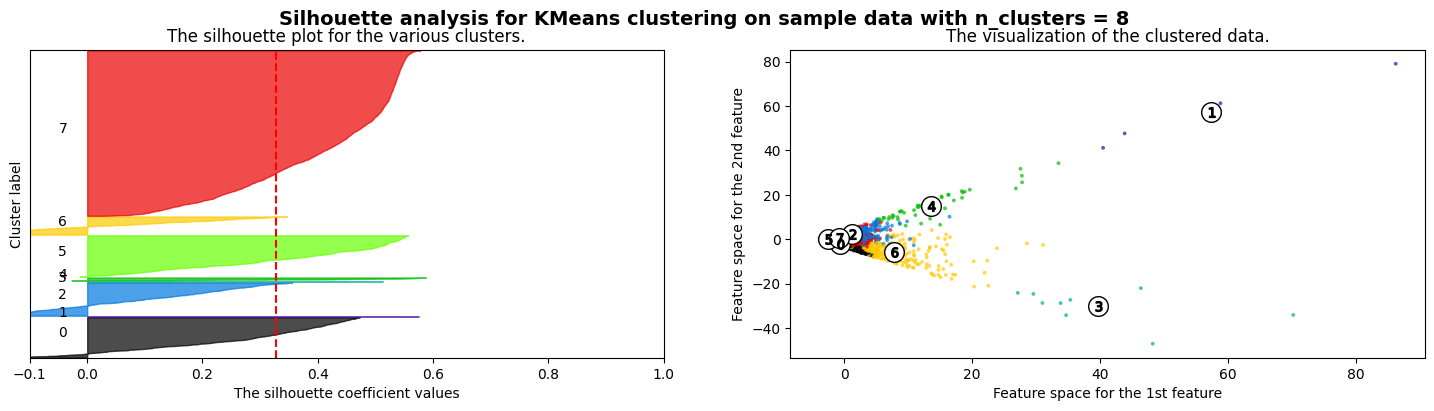

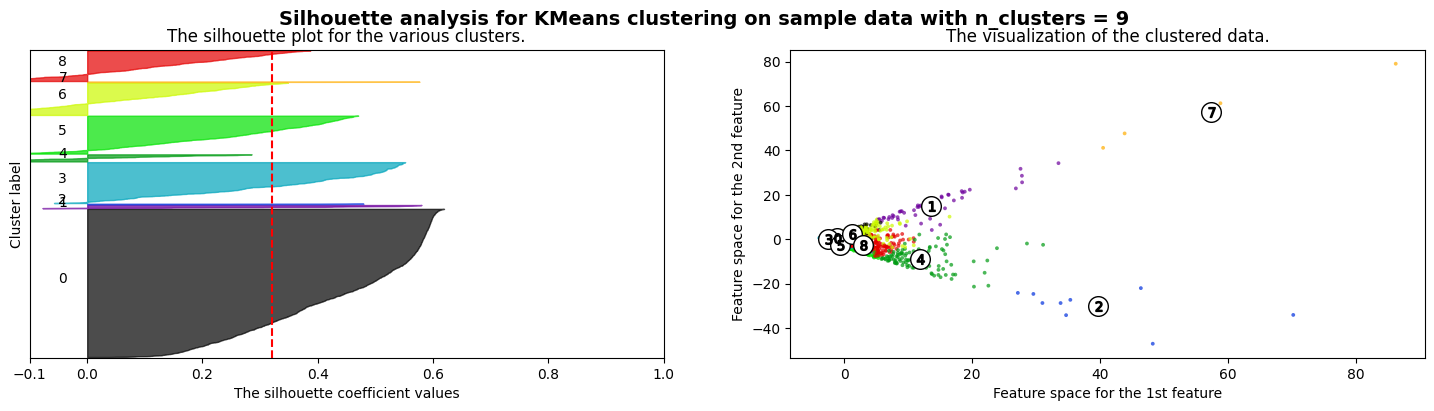

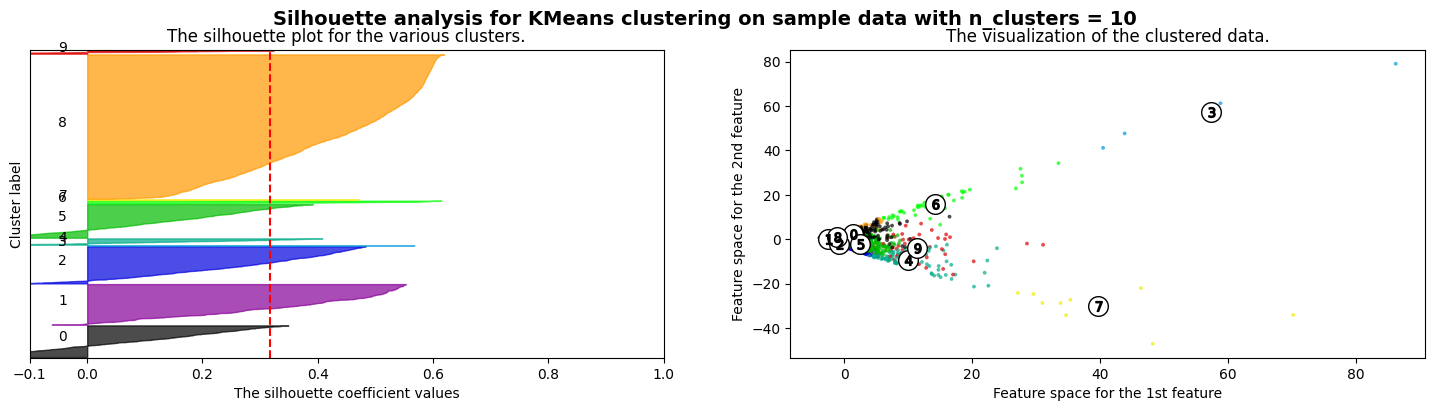

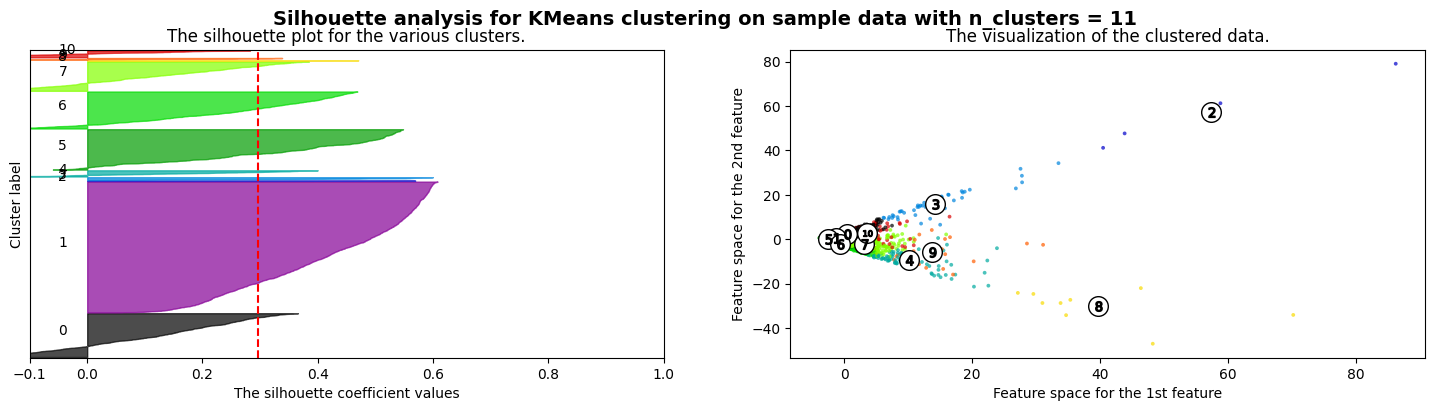

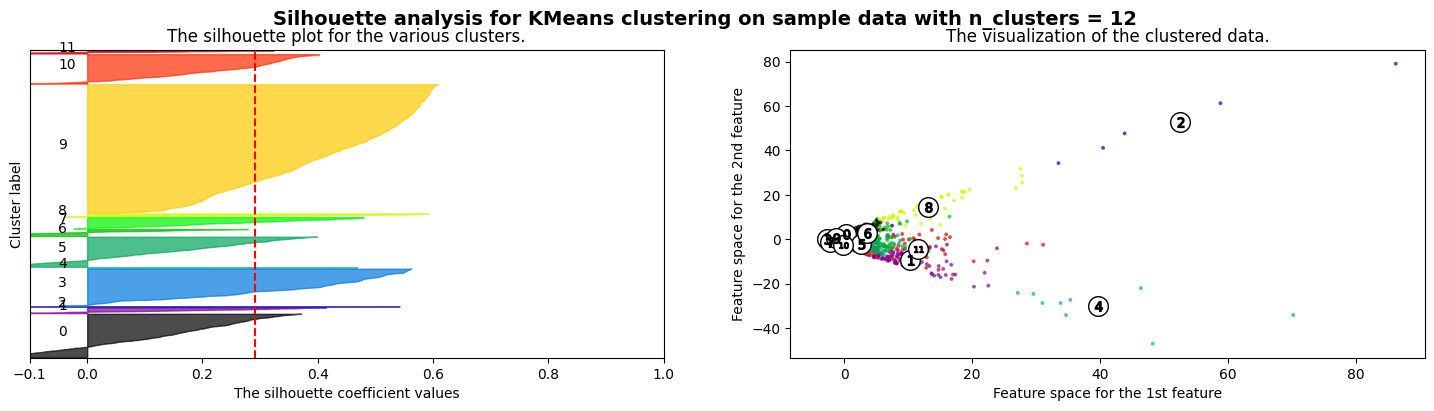

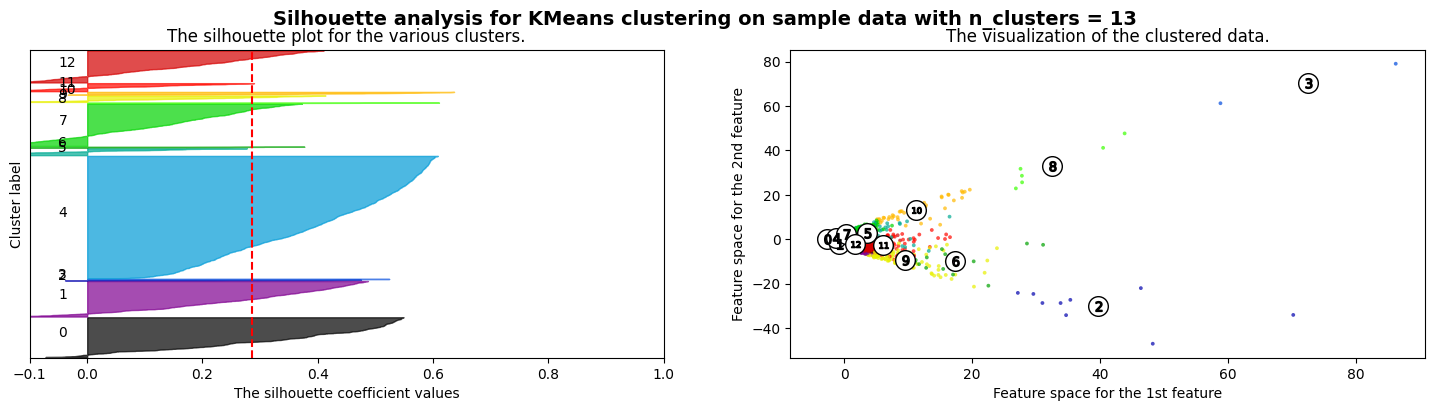

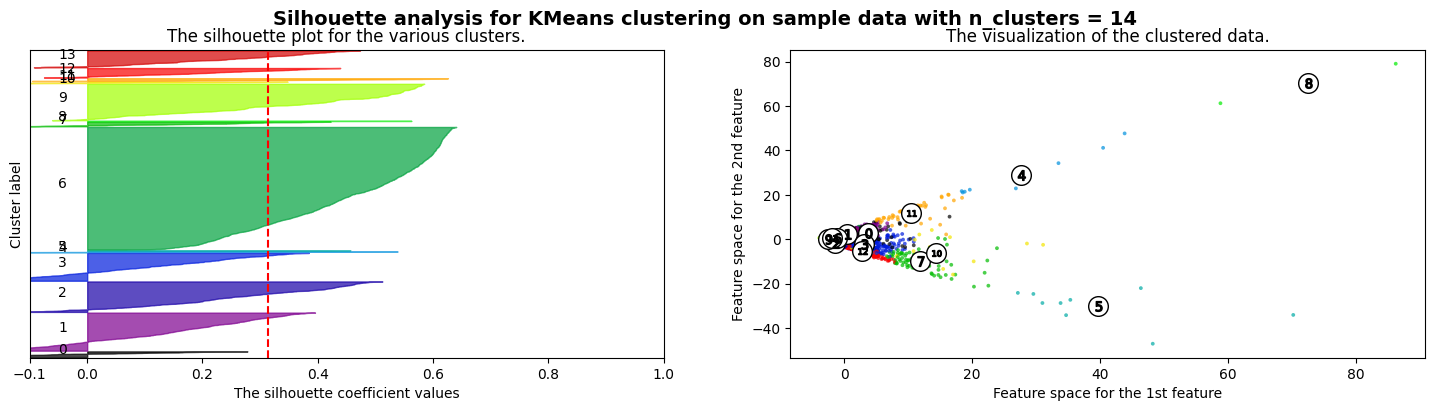

In [25]:
# Display the Silhouette Score and Plot Silhouette Plot

plot_silhouette(range(2, max_cluster), df_scaled_pca, random_state)

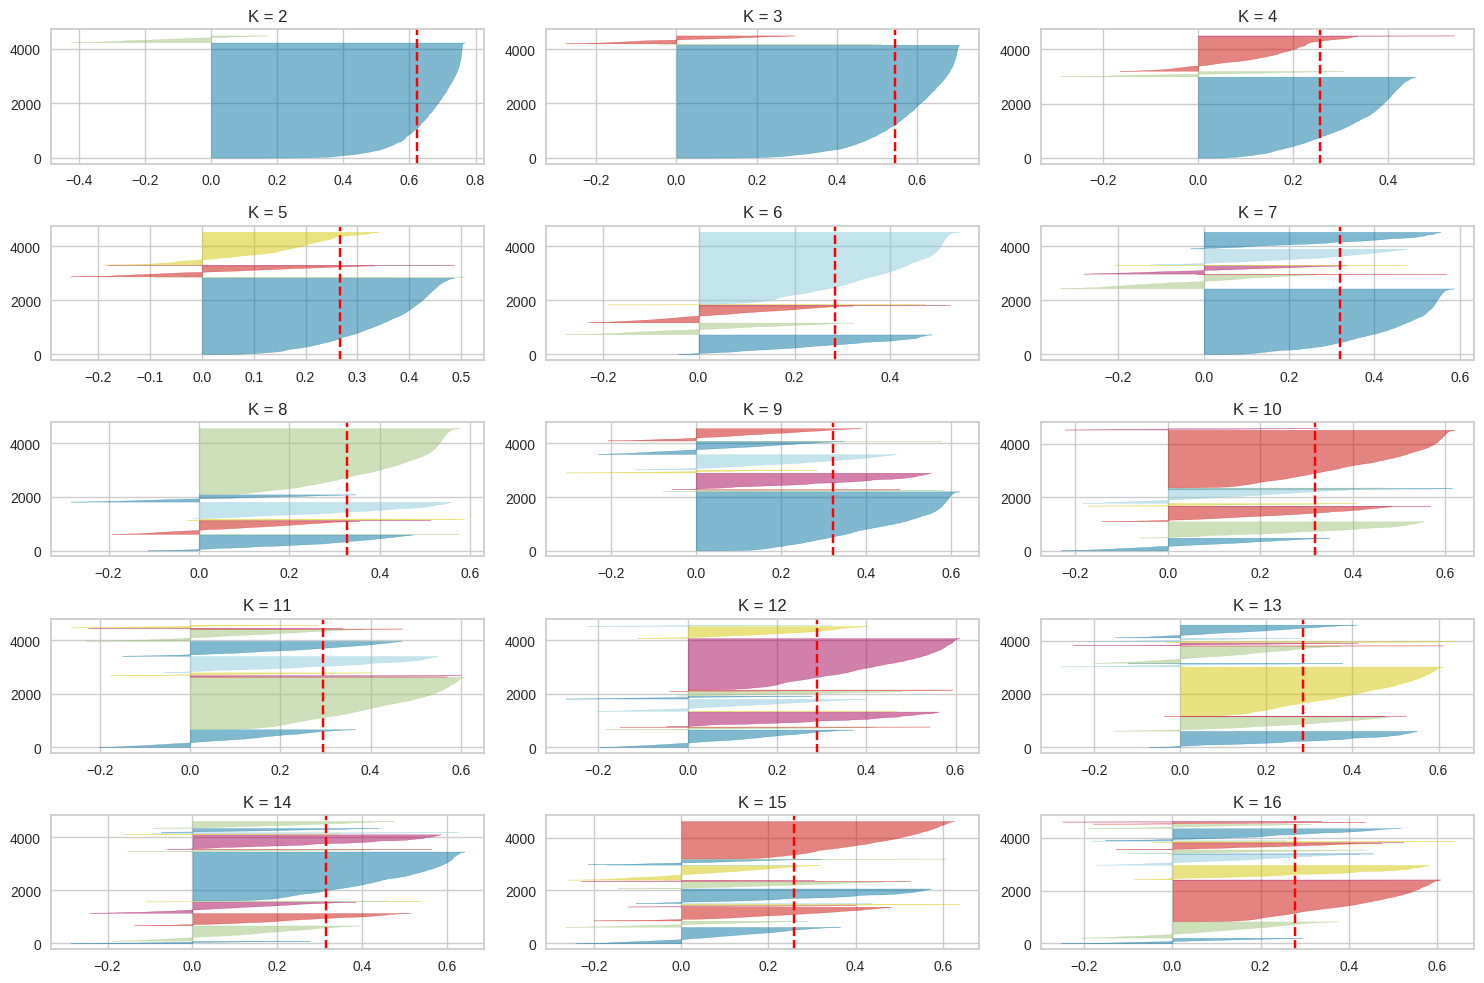

In [26]:
# Display the Silhouette Score and Plot Silhouette Plot
from yellowbrick.cluster import SilhouetteVisualizer

fig, axes = plt.subplots(5, 3, figsize=(15, 10))

# Loop for each plot
for i, ax in enumerate(axes.flatten()):

    # Initialize K-means clustering
    n_clusters = i + 2
    kmeans = KMeans(n_clusters = n_clusters, init = 'k-means++', max_iter = 300, n_init = 10, random_state = random_state)

    # Create SilhouetteVisualizer
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick', ax=ax)

    # Fit visualizer to data
    visualizer.fit(df_scaled_pca)

    # Set title
    ax.set_title(f'K = {n_clusters}')

# Adjust layout
plt.tight_layout()
plt.show()

---
$Insight:$
- Although `n_cluster=2` yields the highest silhouette score, the data distribution in each cluster appears to be highly imbalanced.
- Using visualization doesn't seem to allow for a clear conclusion to be made, but using `n_cluster=8` that we got from the elbow method, it seems that the clusters are too clustered.
- We shall use `n_cluster=4` since it seems to provide a good visualization.

###3.2 Train with optimal number of clusters

In [27]:
# Train with optimal number of clusters

km = KMeans(n_clusters = 4, init = 'k-means++', random_state = random_state)
pred = km.fit_predict(df_scaled_pca)
pred

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 2, 0, ..., 0, 0, 0], dtype=int32)

In [28]:
# Create a new DataFrame with the cluster labels
cluster_df = pd.DataFrame({'cluster': pred}, index=df.index)

# Concatenate the original DataFrame and the cluster labels DataFrame
df = pd.concat([df, cluster_df], axis=1)

In [29]:
# Display the DataFrame with the new 'cluster' column
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,-0.451097,-7.875008,-0.296370,-0.001130,-0.194391,0.000000,-0.450000,0.166668,-0.222223,0.00000,0.00,-0.3750,-0.510204,-0.571776,-0.466914,0.0,-4.0,2
1,-0.453090,-9.000009,-0.173090,0.226661,-0.194391,0.000000,-0.450000,0.166668,-0.222223,0.00000,0.00,-0.3750,0.816327,-0.571776,-0.466914,0.0,-4.0,2
2,-0.058961,-1.125001,-0.190618,0.194273,-0.194391,0.000000,-0.450000,0.166668,-0.222223,0.00000,0.00,-0.0625,-0.367347,0.402028,3.767092,0.0,-4.0,0
3,-0.315520,-5.625006,0.743278,1.919874,-0.194391,0.000000,-0.450000,0.166668,-0.222223,0.00000,0.00,-0.3750,-0.367347,1.402169,-0.329832,0.0,-4.0,2
4,-0.223979,0.000000,0.225806,0.963718,-0.194391,0.000000,-0.450000,0.166668,-0.222223,0.00000,0.00,-0.3750,-0.408163,-0.431475,-0.245721,0.0,-4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4470,4.554251,0.000000,-0.338709,-0.079361,-0.194391,3.839179,-0.600000,-0.333332,-0.222223,2.18182,2.25,-0.4375,1.836735,1.037017,2.957866,0.0,-1.0,0
4471,0.087708,0.000000,-0.338709,-0.079361,-0.194391,1.221058,-0.600000,-0.333332,-0.222223,2.18182,4.50,-0.4375,-0.326531,-0.382727,-0.004787,0.0,-1.0,0
4472,0.234753,0.000000,-0.338709,-0.079361,-0.194391,0.669338,-0.600000,-0.333332,-0.222223,2.18182,2.75,-0.4375,-0.306122,0.103039,0.035075,0.0,-1.0,0
4473,0.098296,0.000000,-0.338709,-0.079361,-0.194391,1.295877,-0.600000,-0.333332,-0.222223,2.18182,2.50,-0.4375,-0.204082,-0.306339,-0.022293,0.0,-1.0,0


---
#After Clustering EDA

##Cluster visualization in 2D

<Axes: >

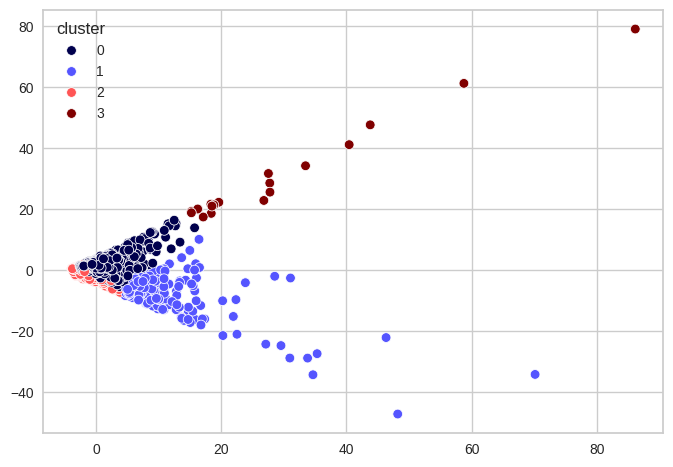

In [30]:
# Cluster visualization in 2D

pca_2d = PCA(n_components=2)
pca_2d.fit(df_scaled)

df_scaled_pca_2d = pca_2d.fit_transform(df_scaled)

sns.scatterplot(x=df_scaled_pca_2d[:,0], y=df_scaled_pca_2d[:,1], hue=df['cluster'], palette='seismic')

In [31]:
X = df.drop('cluster', axis=1)
y = df['cluster']

In [32]:
num_columns = X.select_dtypes(include='number').columns.tolist()

##Visualisation of each cluster's variables

In [34]:
df_0 = df[df['cluster'] == 0]
df_1 = df[df['cluster'] == 1]
df_2 = df[df['cluster'] == 2]
df_3 = df[df['cluster'] == 3]

####Cluster 0

In [40]:
df_0

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
2,-0.058961,-1.125001,-0.190618,0.194273,-0.194391,0.000000,-0.450000,0.166668,-0.222223,0.00000,0.00,-0.0625,-0.367347,0.402028,3.767092,0.0,-4.0,0
4,-0.223979,0.000000,0.225806,0.963718,-0.194391,0.000000,-0.450000,0.166668,-0.222223,0.00000,0.00,-0.3750,-0.408163,-0.431475,-0.245721,0.0,-4.0,0
5,-0.135089,0.000000,0.381047,1.250565,-0.194391,0.000000,-0.450000,0.166668,-0.222223,0.00000,0.00,-0.3750,-0.204082,-0.438547,-0.232071,0.0,-4.0,0
9,-0.162341,0.000000,-0.250268,0.084055,-0.194391,0.000000,-0.300000,0.666668,-0.222223,0.00000,0.00,-0.2500,0.510204,-0.405791,-0.116654,0.0,0.0,0
10,-0.420291,0.000000,-0.231451,-0.079361,0.055672,0.000000,-0.300000,-0.333332,0.111111,0.00000,0.00,-0.2500,0.000000,-0.451502,-0.247427,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4470,4.554251,0.000000,-0.338709,-0.079361,-0.194391,3.839179,-0.600000,-0.333332,-0.222223,2.18182,2.25,-0.4375,1.836735,1.037017,2.957866,0.0,-1.0,0
4471,0.087708,0.000000,-0.338709,-0.079361,-0.194391,1.221058,-0.600000,-0.333332,-0.222223,2.18182,4.50,-0.4375,-0.326531,-0.382727,-0.004787,0.0,-1.0,0
4472,0.234753,0.000000,-0.338709,-0.079361,-0.194391,0.669338,-0.600000,-0.333332,-0.222223,2.18182,2.75,-0.4375,-0.306122,0.103039,0.035075,0.0,-1.0,0
4473,0.098296,0.000000,-0.338709,-0.079361,-0.194391,1.295877,-0.600000,-0.333332,-0.222223,2.18182,2.50,-0.4375,-0.204082,-0.306339,-0.022293,0.0,-1.0,0


In [41]:
# Display basic information about the dataset (columns, data types, non-null counts)
print(df_0.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2985 entries, 2 to 4474
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           2985 non-null   float64
 1   BALANCE_FREQUENCY                 2985 non-null   float64
 2   PURCHASES                         2985 non-null   float64
 3   ONEOFF_PURCHASES                  2985 non-null   float64
 4   INSTALLMENTS_PURCHASES            2985 non-null   float64
 5   CASH_ADVANCE                      2985 non-null   float64
 6   PURCHASES_FREQUENCY               2985 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        2985 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  2985 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            2985 non-null   float64
 10  CASH_ADVANCE_TRX                  2985 non-null   float64
 11  PURCHASES_TRX                     2985 non-null   float64
 12  CREDIT

In [42]:
# Display summary statistics of numerical columns
print(df_0.describe())

           BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
count  2985.000000        2985.000000  2985.000000       2985.000000   
mean      0.605651          -0.240300     0.279101          0.580969   
std       1.071115           0.671832     0.862770          1.169786   
min      -0.452386          -5.400005    -0.338709         -0.079361   
25%      -0.099757           0.000000    -0.338709         -0.079361   
50%       0.254394           0.000000    -0.075269         -0.013299   
75%       0.941007           0.000000     0.510349          0.755068   
max       7.926754           0.000000     5.003255          8.439119   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             2985.000000   2985.000000          2985.000000   
mean                 0.413075      1.132347            -0.079817   
std                  1.114043      1.837552             0.482907   
min                 -0.194391      0.000000            -0.600000   
25%        

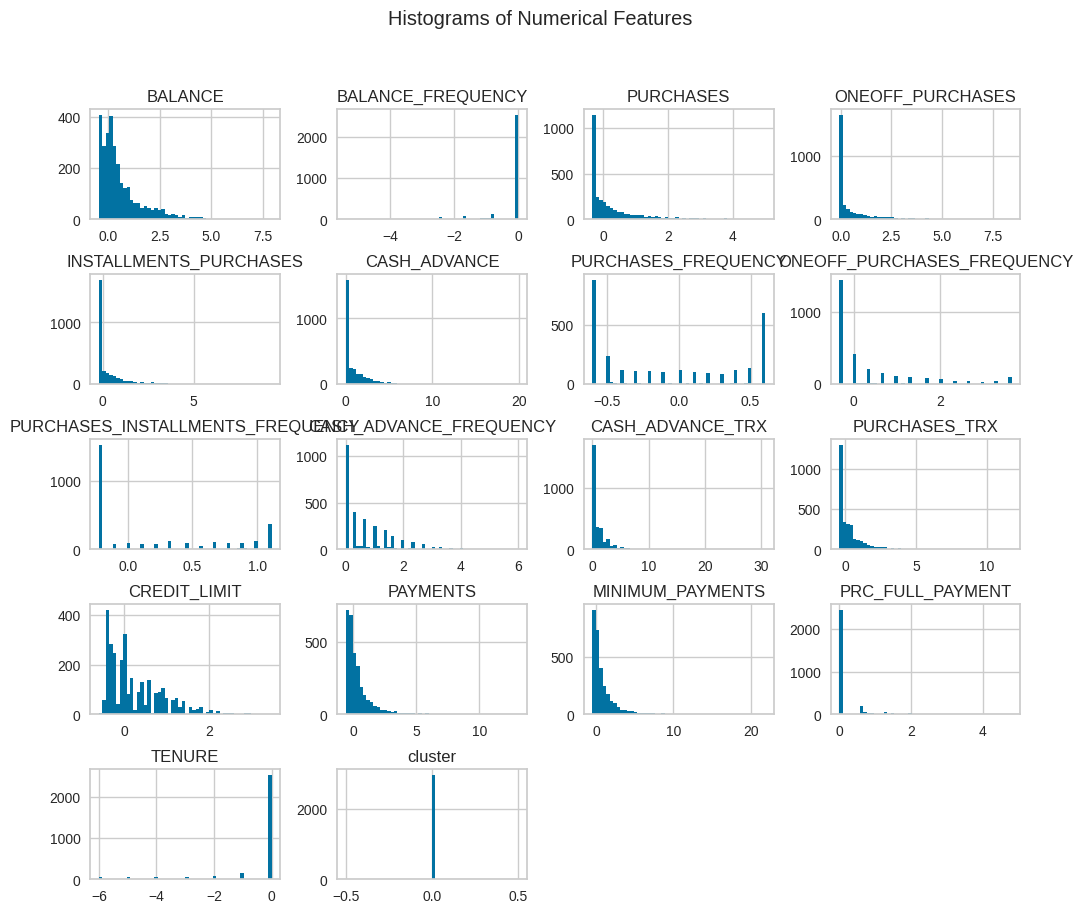

In [43]:
# Visualize the distribution of numerical features (histograms)
df_0.hist(bins=50, figsize=(12, 10))
plt.suptitle('Histograms of Numerical Features')
plt.subplots_adjust(hspace=0.5)
plt.show()

In [44]:
# Calculate skewness for each column
skewness = df_0.skew()

# Display skewness values
print("Skewness for each column:")
print(skewness)

Skewness for each column:
BALANCE                             1.987195
BALANCE_FREQUENCY                  -3.362980
PURCHASES                           1.942534
ONEOFF_PURCHASES                    2.568987
INSTALLMENTS_PURCHASES              3.062829
CASH_ADVANCE                        2.849887
PURCHASES_FREQUENCY                 0.272545
ONEOFF_PURCHASES_FREQUENCY          1.696392
PURCHASES_INSTALLMENTS_FREQUENCY    0.740967
CASH_ADVANCE_FREQUENCY              1.400292
CASH_ADVANCE_TRX                    5.468921
PURCHASES_TRX                       3.135808
CREDIT_LIMIT                        1.269482
PAYMENTS                            3.315865
MINIMUM_PAYMENTS                    4.829050
PRC_FULL_PAYMENT                    3.186963
TENURE                             -3.136929
cluster                             0.000000
dtype: float64


####Cluster 1

In [45]:
# Display basic information about the dataset (columns, data types, non-null counts)
print(df_1.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 198 entries, 195 to 4417
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           198 non-null    float64
 1   BALANCE_FREQUENCY                 198 non-null    float64
 2   PURCHASES                         198 non-null    float64
 3   ONEOFF_PURCHASES                  198 non-null    float64
 4   INSTALLMENTS_PURCHASES            198 non-null    float64
 5   CASH_ADVANCE                      198 non-null    float64
 6   PURCHASES_FREQUENCY               198 non-null    float64
 7   ONEOFF_PURCHASES_FREQUENCY        198 non-null    float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  198 non-null    float64
 9   CASH_ADVANCE_FREQUENCY            198 non-null    float64
 10  CASH_ADVANCE_TRX                  198 non-null    float64
 11  PURCHASES_TRX                     198 non-null    float64
 12  CREDI

In [46]:
# Display summary statistics of numerical columns
print(df_1.describe())

          BALANCE  BALANCE_FREQUENCY   PURCHASES  ONEOFF_PURCHASES  \
count  198.000000         198.000000  198.000000        198.000000   
mean     1.347095          -0.203719    7.067457          9.436612   
std      1.738807           0.856283    5.010225          9.085148   
min     -0.435303          -8.181827    0.067676         -0.079361   
25%     -0.029782           0.000000    4.442869          5.049924   
50%      0.785505           0.000000    5.336931          7.071668   
75%      2.271652           0.000000    7.723832         11.101939   
max      9.164295           0.000000   38.283876         70.544157   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count              198.000000    198.000000           198.000000   
mean                 5.072221      1.287922             0.508696   
std                  5.776802      4.022756             0.194061   
min                 -0.194391      0.000000            -0.500000   
25%                  1.026070

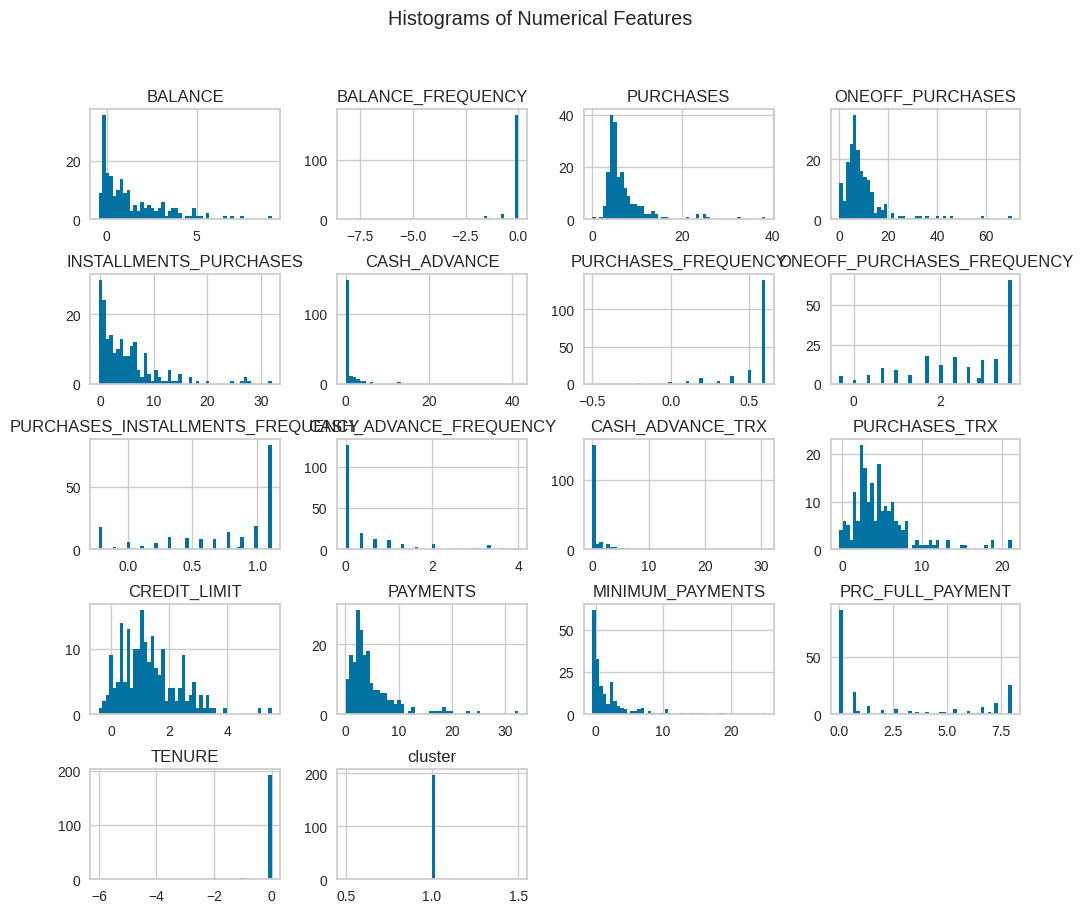

In [47]:
# Visualize the distribution of numerical features (histograms)
df_1.hist(bins=50, figsize=(12, 10))
plt.suptitle('Histograms of Numerical Features')
plt.subplots_adjust(hspace=0.5)
plt.show()

####Cluster 2

In [48]:
# Display basic information about the dataset (columns, data types, non-null counts)
print(df_2.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1273 entries, 0 to 4467
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           1273 non-null   float64
 1   BALANCE_FREQUENCY                 1273 non-null   float64
 2   PURCHASES                         1273 non-null   float64
 3   ONEOFF_PURCHASES                  1273 non-null   float64
 4   INSTALLMENTS_PURCHASES            1273 non-null   float64
 5   CASH_ADVANCE                      1273 non-null   float64
 6   PURCHASES_FREQUENCY               1273 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        1273 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  1273 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            1273 non-null   float64
 10  CASH_ADVANCE_TRX                  1273 non-null   float64
 11  PURCHASES_TRX                     1273 non-null   float64
 12  CREDIT

In [49]:
# Display summary statistics of numerical columns
print(df_2.describe())

           BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
count  1273.000000        1273.000000  1273.000000       1273.000000   
mean     -0.391871          -3.294560     0.361366          0.534029   
std       0.100212           2.880909     0.850363          1.162322   
min      -0.453090          -9.000009    -0.338709         -0.079361   
25%      -0.444444          -5.727282    -0.222513         -0.079361   
50%      -0.426663          -3.272727     0.050524         -0.079361   
75%      -0.377147           0.000000     0.620025          0.616355   
max       0.518824           0.000000     4.602713          7.640816   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             1273.000000   1273.000000          1273.000000   
mean                 0.663913      0.163595             0.067740   
std                  1.261565      0.562997             0.453575   
min                 -0.194391      0.000000            -0.600000   
25%        

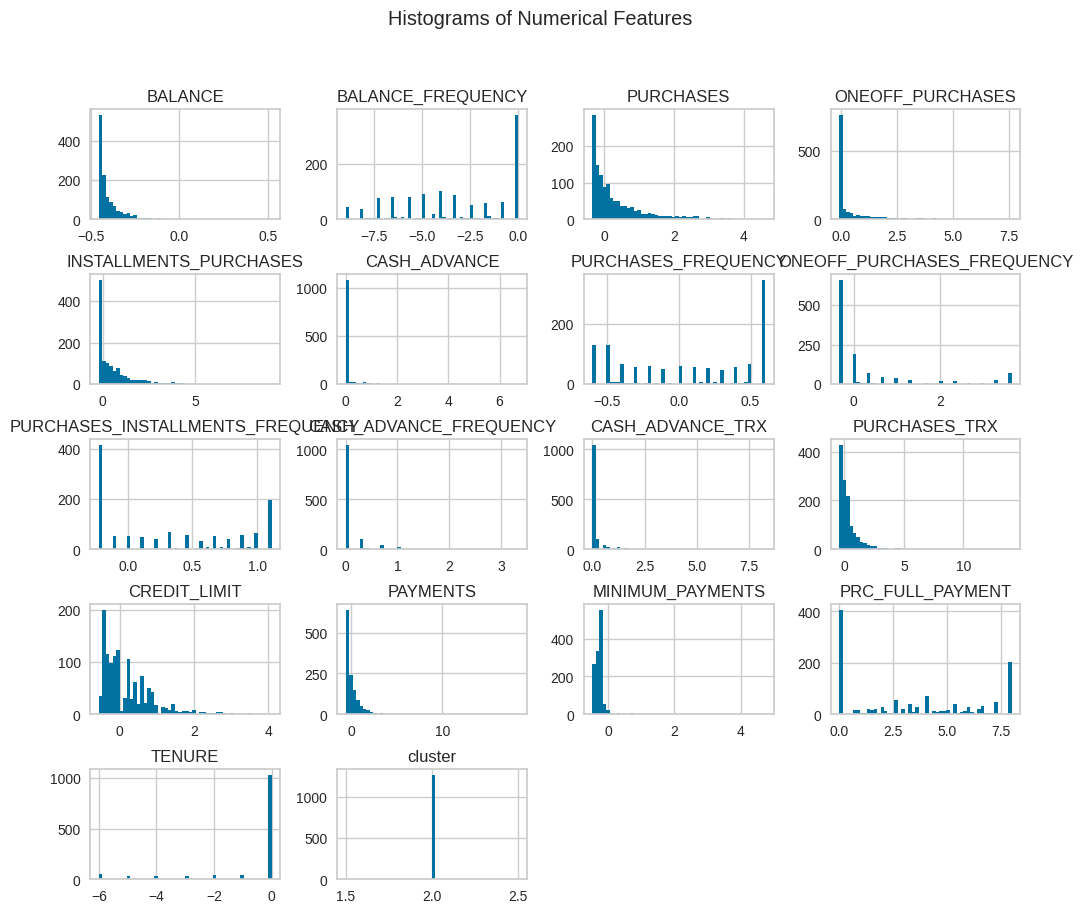

In [50]:
# Visualize the distribution of numerical features (histograms)
df_2.hist(bins=50, figsize=(12, 10))
plt.suptitle('Histograms of Numerical Features')
plt.subplots_adjust(hspace=0.5)
plt.show()

####Cluster 3

In [51]:
# Display basic information about the dataset (columns, data types, non-null counts)
print(df_3.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19 entries, 452 to 4029
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           19 non-null     float64
 1   BALANCE_FREQUENCY                 19 non-null     float64
 2   PURCHASES                         19 non-null     float64
 3   ONEOFF_PURCHASES                  19 non-null     float64
 4   INSTALLMENTS_PURCHASES            19 non-null     float64
 5   CASH_ADVANCE                      19 non-null     float64
 6   PURCHASES_FREQUENCY               19 non-null     float64
 7   ONEOFF_PURCHASES_FREQUENCY        19 non-null     float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  19 non-null     float64
 9   CASH_ADVANCE_FREQUENCY            19 non-null     float64
 10  CASH_ADVANCE_TRX                  19 non-null     float64
 11  PURCHASES_TRX                     19 non-null     float64
 12  CREDIT

In [52]:
# Display summary statistics of numerical columns
print(df_3.describe())

         BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
count  19.000000          19.000000  19.000000         19.000000   
mean    1.796935          -0.258373   0.832295          0.101940   
std     1.287663           0.670966   1.798227          0.392939   
min     0.320390          -2.454545  -0.338709         -0.079361   
25%     0.798626           0.000000  -0.277741         -0.079361   
50%     1.344537           0.000000   0.205841         -0.079361   
75%     2.447580           0.000000   0.973863          0.020670   
max     5.043869           0.000000   6.943040          1.189406   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count               19.000000     19.000000            19.000000   
mean                 2.306952      1.274631             0.037320   
std                  4.199020      2.342654             0.543666   
min                 -0.194391      0.000000            -0.600000   
25%                 -0.194391      0.000000    

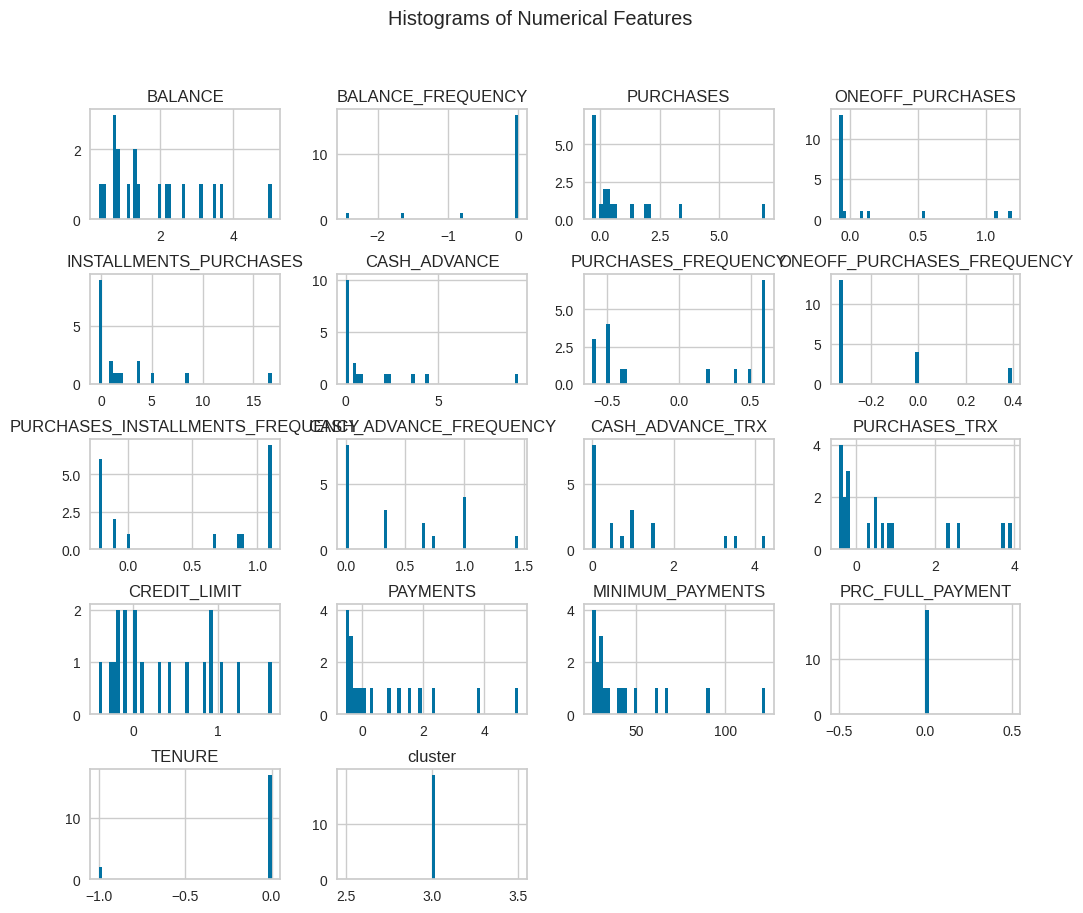

In [53]:
# Visualize the distribution of numerical features (histograms)
df_3.hist(bins=50, figsize=(12, 10))
plt.suptitle('Histograms of Numerical Features')
plt.subplots_adjust(hspace=0.5)
plt.show()

#Conclusion

Now let's see if we can draw a clear conclusion based on the variable means by their clusters.

In [54]:
df_0_mean = pd.DataFrame(df_0.mean(numeric_only=True))
df_1_mean = pd.DataFrame(df_1.mean(numeric_only=True))
df_2_mean = pd.DataFrame(df_2.mean(numeric_only=True))
df_3_mean = pd.DataFrame(df_3.mean(numeric_only=True))

In [55]:
df_0_mean.T

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,0.605651,-0.2403,0.279101,0.580969,0.413075,1.132347,-0.079817,0.386507,0.196032,0.736043,1.106198,0.282915,0.267909,0.425562,1.001562,0.195006,-0.436181,0.0


In [56]:
df_1_mean.T

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,1.347095,-0.203719,7.067457,9.436612,5.072221,1.287922,0.508696,2.519928,0.74827,0.468166,1.04798,4.849432,1.337095,4.951248,2.260743,2.483174,-0.060606,1.0


In [57]:
df_2_mean.T

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,-0.391871,-3.29456,0.361366,0.534029,0.663913,0.163595,0.06774,0.377385,0.34154,0.108775,0.129615,0.31412,0.231201,0.197033,-0.240985,3.381185,-0.659859,2.0


In [58]:
df_3_mean.T

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,1.796935,-0.258373,0.832295,0.10194,2.306952,1.274631,0.03732,-0.186602,0.455077,0.448166,0.986842,0.690789,0.33942,0.723028,44.131303,0.0,-0.105263,3.0


$Insight:$
- **Cluster 0** : Have the highest `CASH_ADVANCE_FREQUENCY`, `CASH_ADVANCE_TRX`
- **Cluster 1** : Have the highest `BALANCE_FREQUENCY`, `PURCHASES`, `ONEOFF_PURCHASES`, `INSTALLMENTS_PURCHASES`, `CASH_ADVANCE`, `PURCHASES_FREQUENCY`, `ONEOFF_PURCHASES_FREQUENCY`, `PURCHASES_INSTALLMENTS_FREQUENCY`, `PURCHASES_TRX`, `CREDIT_LIMIT`, `PAYMENTS`, `PRC_FULL_PAYMENT`, `TENURE`
- **Cluster 2** : Have no highest values.
- **Cluster 3** : Have the highest `BALANCE`, `MINIMUM_PAYMENTS`

Referencing each variable descriptions in the dataset's schema, we can conclude that:
- **Cluster 0** : This cluster appears to represent customers who have a high frequency of cash advances and a high number of cash advance transactions. This suggests that customers in this cluster tend to rely more on cash advances.

- **Cluster 1** : This cluster are creditor who updates their account's balance the most, makes the most purchases, including purchases in one go and in installments, gives the most cash in advance, does the most full payments, and is therefore the ones with the highest credit limit.

- **Cluster 2** : There are no distinct highest values for any specific features in this cluster, suggesting that the customers within this cluster may have average or balanced behavior across the features considered.

- **Cluster 3** : Customers with high balances in their account, their low balance update frequency means that they rarely deposit or withdraw from their accounts. They also have the highest minimum payments that might indicate their reluctancy in using credit in general and therefore would pay as much as they can to avoid having lots of unpaid debt.

We can conclude that **cluster 1 are the ideal credit** user. As customers in this cluster are generally active users with diverse purchase behaviors, higher credit limits, and consistent payment patterns.



---
#Model Saving

In [59]:
with open('pca.pkl', 'wb') as file:
    pickle.dump(pca, file)

with open('km.pkl', 'wb') as file:
    pickle.dump(km, file)

with open('robustscaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

---
#Model Inference

In [60]:
X

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.451097,-7.875008,-0.296370,-0.001130,-0.194391,0.000000,-0.450000,0.166668,-0.222223,0.00000,0.00,-0.3750,-0.510204,-0.571776,-0.466914,0.0,-4.0
1,-0.453090,-9.000009,-0.173090,0.226661,-0.194391,0.000000,-0.450000,0.166668,-0.222223,0.00000,0.00,-0.3750,0.816327,-0.571776,-0.466914,0.0,-4.0
2,-0.058961,-1.125001,-0.190618,0.194273,-0.194391,0.000000,-0.450000,0.166668,-0.222223,0.00000,0.00,-0.0625,-0.367347,0.402028,3.767092,0.0,-4.0
3,-0.315520,-5.625006,0.743278,1.919874,-0.194391,0.000000,-0.450000,0.166668,-0.222223,0.00000,0.00,-0.3750,-0.367347,1.402169,-0.329832,0.0,-4.0
4,-0.223979,0.000000,0.225806,0.963718,-0.194391,0.000000,-0.450000,0.166668,-0.222223,0.00000,0.00,-0.3750,-0.408163,-0.431475,-0.245721,0.0,-4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4470,4.554251,0.000000,-0.338709,-0.079361,-0.194391,3.839179,-0.600000,-0.333332,-0.222223,2.18182,2.25,-0.4375,1.836735,1.037017,2.957866,0.0,-1.0
4471,0.087708,0.000000,-0.338709,-0.079361,-0.194391,1.221058,-0.600000,-0.333332,-0.222223,2.18182,4.50,-0.4375,-0.326531,-0.382727,-0.004787,0.0,-1.0
4472,0.234753,0.000000,-0.338709,-0.079361,-0.194391,0.669338,-0.600000,-0.333332,-0.222223,2.18182,2.75,-0.4375,-0.306122,0.103039,0.035075,0.0,-1.0
4473,0.098296,0.000000,-0.338709,-0.079361,-0.194391,1.295877,-0.600000,-0.333332,-0.222223,2.18182,2.50,-0.4375,-0.204082,-0.306339,-0.022293,0.0,-1.0


In [61]:
X_new = pd.DataFrame()
X_new = X.copy()
X_new = X_new.drop(axis=0, index=X_new.index)

In [62]:
new_values_dict = {
    'BALANCE': 0.453090,
    'BALANCE_FREQUENCY': -5.625006,
    'PURCHASES': -0.145833,
    'ONEOFF_PURCHASES': -0.079361,
    'INSTALLMENTS_PURCHASES': -0.194391,
    'CASH_ADVANCE': 1.295877,
    'PURCHASES_FREQUENCY': -0.600000,
    'ONEOFF_PURCHASES_FREQUENCY': -0.333332,
    'PURCHASES_INSTALLMENTS_FREQUENCY': -0.222223,
    'CASH_ADVANCE_FREQUENCY': 0.00000,
    'CASH_ADVANCE_TRX': 4.50,
    'PURCHASES_TRX': -0.4375,
    'CREDIT_LIMIT': 1.530612,
    'PAYMENTS': -0.306339,
    'MINIMUM_PAYMENTS': 2.957866,
    'PRC_FULL_PAYMENT': 0.0,
    'TENURE': -1.0
}

# Append new row to X_new
X_new = X_new.append(new_values_dict, ignore_index=True)

<ipython-input-62-137adf11406c>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_new = X_new.append(new_values_dict, ignore_index=True)


In [63]:
X_new

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.45309,-5.625006,-0.145833,-0.079361,-0.194391,1.295877,-0.6,-0.333332,-0.222223,0.0,4.5,-0.4375,1.530612,-0.306339,2.957866,0.0,-1.0


In [64]:
X_new_scaled = X_new
X_new_scaled[numerical_columns] = scaler.fit_transform(X_new[numerical_columns])

X_new_scaled_pca = pca.transform(X_new_scaled)

predicted_cluster = km.predict(X_new_scaled_pca)

print(f"The new data is in cluster :{predicted_cluster}")

The new data is in cluster :[0]



$Insight:$
- The new data is classified as **cluster 0**.

---
#Conceptual Problems

* Apakah yang dimaksud dengan inertia pada algoritma K-Means ?

* Jelaskan yang dimaksud dengan Elbow Method (alasan penggunaan, cara penggunaan, kelemahan/kelebihan, dll) !



---
Jawaban:
* Inertia adalah jumlah kuadrat jarak antara setiap titik data dalam kluster dengan centroid kluster tersebut. Dalam dataset yang digunakan, dengan menggunakan 8 kluster, inertia (WCSS) berada di sekitar 9000, semakin kecil nilai inertia menunjukkan bahwa klustering semakin baik, dan pengurangan inertia berkurang secara eksponensial di atas 8 kluster.
* Elbow Method adalah metode yang digunakan untuk menentukan nilai kluster (`n_clusters`) yang optimal. Cara penggunaannya adalah dengan membuat visualisasi antara inertia(WCSS) terhadap jumlah kluster, selanjutnya elbow point akan ditemukan dimana pengurangan intertia sudah berkurang.